In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# https://docs.google.com/spreadsheets/d/1VK-Zs72ebK6ddwvDYFN2cA04PDTbVLXJeylmdJ7OxkM/edit#gid=1517061328

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

worksheet = gc.open('PGSS2023').get_worksheet(6) #CrowdSourcedSentimentData

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
df = pd.DataFrame.from_records(rows[1:])

df.columns = rows[0]

df = df.dropna()

import numpy as np
df = df.replace('', np.nan).dropna()

df

[['Slno', 'R', 'G', 'B', 'WhoThinksSo', 'Color'], ['1', '190', '6', '203', 'Darren', 'Purple'], ['2', '181', '28', '192', 'Darren', 'Purple'], ['3', '205', '40', '238', 'Darren', 'Purple'], ['4', '186', '7', '252', 'Yanwei', 'Purple'], ['5', '205', '41', '255', 'Sooraj', 'Purple'], ['6', '181', '55', '219', 'Sooraj', 'Purple'], ['7', '116', '22', '185', 'Sooraj', 'Purple'], ['8', '184', '32', '249', 'Lihini', 'Purple'], ['9', '144', '49', '214', 'Sooraj', 'Purple'], ['10', '110', '61', '142', 'Kamya', 'Purple'], ['11', '145', '66', '198', 'Kamya', 'Purple'], ['12', '192', '160', '213', 'Kamya', 'Purple'], ['13', '148', '60', '175', 'John', 'Purple'], ['14', '180', '160', '213', 'Kamya', 'Purple'], ['15', '166', '130', '228', 'Kamya', 'Purple'], ['16', '221', '216', '235', 'Edward', 'Purple'], ['17', '127', '0', '255', 'Karina', 'Purple'], ['18', '154', '8', '252', 'Yanwei', 'Purple'], ['19', '111', '50', '168', 'Olina', 'Purple'], ['20', '204', '189', '245', 'Kamya', 'Purple'], ['21', 

,Slno,R,G,B,WhoThinksSo,Color
0,1,190,6,203,Darren,Purple
1,2,181,28,192,Darren,Purple
2,3,205,40,238,Darren,Purple
3,4,186,7,252,Yanwei,Purple
4,5,205,41,255,Sooraj,Purple
...,...,...,...,...,...,...
196,197,0,182,255,Parth,NotPurple
197,198,255,0,165,Parth,NotPurple
198,199,209,211,119,Parth,NotPurple
199,200,119,211,143,Parth,NotPurple


# EDA on this dataset:  Visualize the distribution of R , G and B, without considering WhoThinksSo

In [3]:
# Drop the unnecessary column 'Index'
df = df[['R', 'G', 'B', 'WhoThinksSo', 'Color']]
df.head()

,R,G,B,WhoThinksSo,Color
0,190,6,203,Darren,Purple
1,181,28,192,Darren,Purple
2,205,40,238,Darren,Purple
3,186,7,252,Yanwei,Purple
4,205,41,255,Sooraj,Purple


In [4]:
df['R'] = df['R'].astype('float')
df['G'] = df['G'].astype('float')
df['B'] = df['B'].astype('float')
df['WhoThinksSo'] = df['WhoThinksSo'].astype('category')
df['Color'] = df['Color'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   R            201 non-null    float64 
 1   G            201 non-null    float64 
 2   B            201 non-null    float64 
 3   WhoThinksSo  201 non-null    category
 4   Color        201 non-null    category
dtypes: category(2), float64(3)
memory usage: 6.0 KB


<ipython-input-4-215d61881252>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['R'] = df['R'].astype('float')
<ipython-input-4-215d61881252>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['G'] = df['G'].astype('float')
<ipython-input-4-215d61881252>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexin

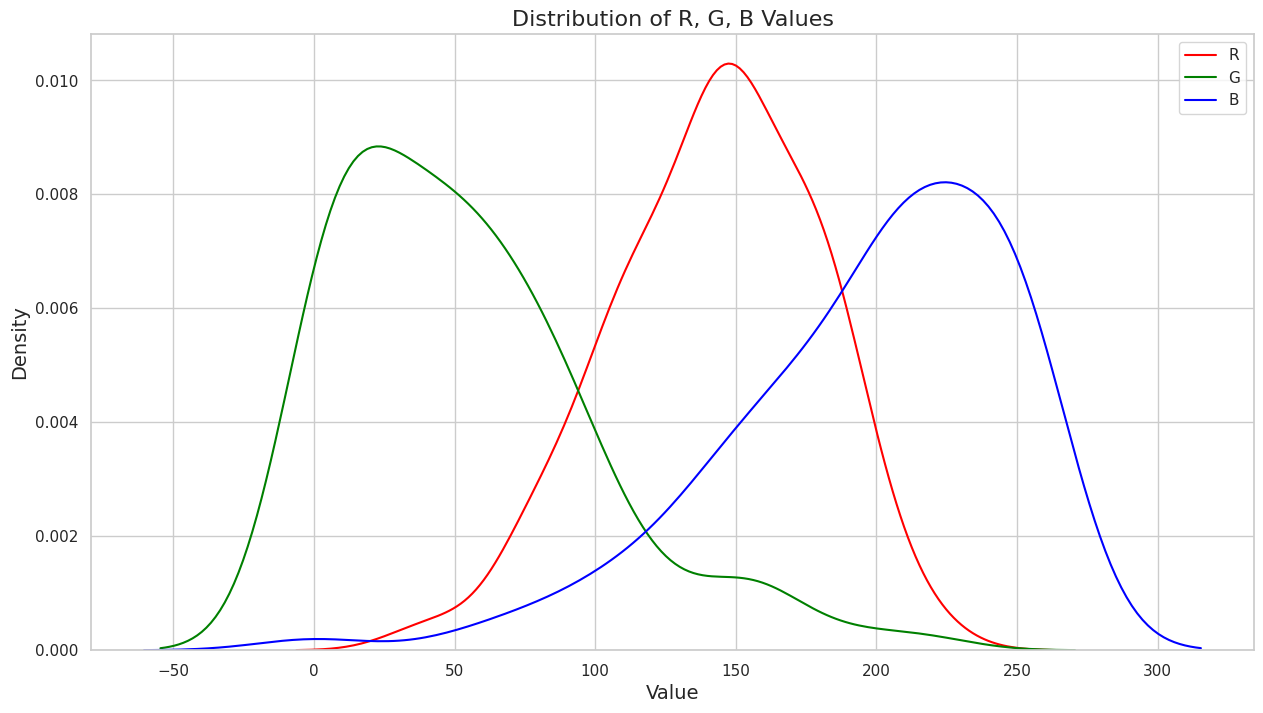

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create a new figure
plt.figure(figsize=(15, 8))

# Create the overall distribution plot for R, G, and B values
sns.kdeplot(data=df[df['Color']=="Purple"], x='R', color='red', label='R')
sns.kdeplot(data=df[df['Color']=="Purple"], x='G', color='green', label='G')
sns.kdeplot(data=df[df['Color']=="Purple"], x='B', color='blue', label='B')

# Set the title and labels
plt.title('Distribution of R, G, B Values', size=16)
plt.xlabel('Value', size=14)
plt.ylabel('Density', size=14)

# Show the legend
plt.legend()

# Show the plot
plt.show()


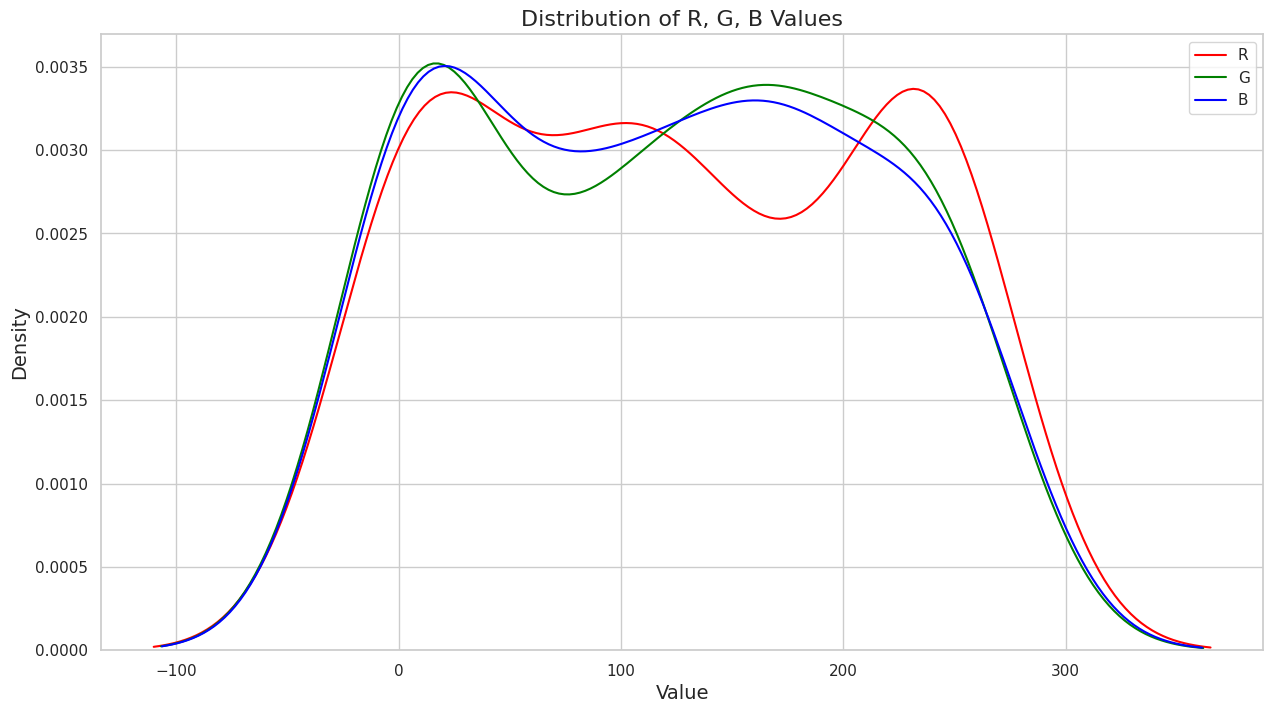

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Create a new figure
plt.figure(figsize=(15, 8))

# Create the overall distribution plot for R, G, and B values
sns.kdeplot(data=df[df['Color']=="NotPurple"], x='R', color='red', label='R')
sns.kdeplot(data=df[df['Color']=="NotPurple"], x='G', color='green', label='G')
sns.kdeplot(data=df[df['Color']=="NotPurple"], x='B', color='blue', label='B')

# Set the title and labels
plt.title('Distribution of R, G, B Values', size=16)
plt.xlabel('Value', size=14)
plt.ylabel('Density', size=14)

# Show the legend
plt.legend()

# Show the plot
plt.show()


<Axes: xlabel='Color', ylabel='B'>

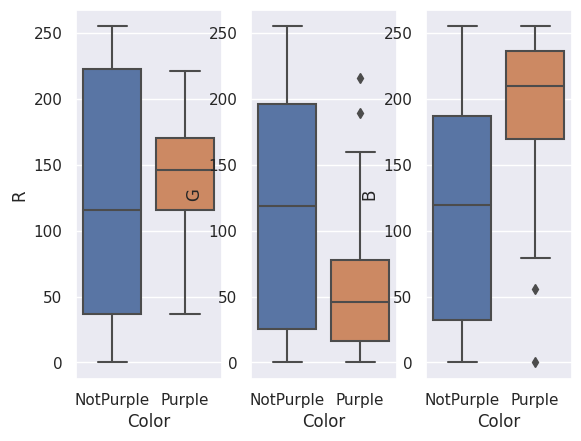

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
fig, axes = plt.subplots(1,3)
sns.boxplot(x='Color', y = 'R', data=df, ax=axes[0])
sns.boxplot(x='Color', y = 'G', data=df, ax=axes[1])
sns.boxplot(x='Color', y = 'B', data=df, ax=axes[2])

# Lets build a set of models to classify Purple

## Build a fully connected MLP model to classify the color purple using scalar features, R, G and B.

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assume X_train is your feature matrix and Y_train is your target variable

from sklearn.model_selection import train_test_split

X = df.drop(['Color', 'WhoThinksSo'], axis=1)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['Color'])

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()

# Add the first hidden layer
model.add(Dense(32, activation='relu', input_shape=(3,)))

# Add the second hidden layer
model.add(Dense(16, activation='relu'))

# Add the third hidden layer
model.add(Dense(8, activation='relu'))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Fit the model
model.fit(X_train, Y_train, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
5/5 [==============================] - 2s 10ms/step - loss: 6.6931 - accuracy: 0.4625
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 4.0665 - accuracy: 0.6750
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 3.4257 - accuracy: 0.7688
Epoch 4/100
5/5 [==============================] - 0s 8ms/step - loss: 2.6862 - accuracy: 0.7750
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 2.3814 - accuracy: 0.7875
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 2.0854 - accuracy: 0.7688
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 1.6963 - accuracy: 0.8000
Epoch 8/100
5/5 [==============================] - 0s 8ms/step - loss: 1.3249 - accuracy: 0.8250
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 1.0559 - accuracy: 0.8438
Epoch 10/100
5/5 [==============================] - 0s 7ms/step - loss: 0.8187 - accuracy: 0.8625
Epoch 11/100
5/5 [==========

In [22]:
# Assume that X_test is your new dataset
predictions = model.predict(X_test)

# Convert probabilities into class labels
class_predictions = ['positive' if x > 0.5 else 'negative' for x in predictions]

# class_predictions

from sklearn.metrics import classification_report

report = classification_report(Y_test, le.fit_transform(class_predictions), target_names=['NotPurple', 'Purple'])
print(report)


2/2 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

   NotPurple       0.89      0.84      0.86        19
      Purple       0.87      0.91      0.89        22

    accuracy                           0.88        41
   macro avg       0.88      0.88      0.88        41
weighted avg       0.88      0.88      0.88        41



In [20]:
from sklearn import metrics

print('Accuracy:', metrics.accuracy_score(Y_test, le.fit_transform(class_predictions)))

Accuracy: 0.8780487804878049


In [21]:
## Save dt_classifier to a pkl file for loading later
import pickle

with open('/content/gdrive/MyDrive/PGSS2022/PGSS2023/Week03/keras_mlp_model_PurpleClassifier.pkl', 'wb') as f:
    pickle.dump(model, f)


# H2O

In [8]:
! pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 MB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.42.0.2-py2.py3-none-any.whl size=249153908 sha256=82fa335b4bd24b8f9f02c545de15646628bfbac0f3f1ac019bd820b341b24a0f
  Stored in directory: /root/.cache/pip/wheels/31/f7/e0/e32942d9f76cb1cb14c949b7772eb78979d2e0132aae6c6780
Successfully built h2o


In [9]:
from google.colab import output
output.serve_kernel_port_as_window(54321)

<IPython.core.display.Javascript object>

In [10]:
!npm install -g localtunnel

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 3.297s


In [11]:
import h2o
# h2o.shutdown()
h2o.init(bind_to_localhost=False, ip="localhost")
h2odf = h2o.H2OFrame(df, destination_frame="purpleClassifierData.hex")

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.19" 2023-04-18; OpenJDK Runtime Environment (build 11.0.19+7-post-Ubuntu-0ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.19+7-post-Ubuntu-0ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpr6h7xqk2
  JVM stdout: /tmp/tmpr6h7xqk2/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpr6h7xqk2/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,11 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,3 days
H2O_cluster_name:,H2O_from_python_unknownUser_bdketz
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [12]:
# !lt --port 54321

your url is: https://tall-buses-see.loca.lt
^C


In [13]:
df.to_csv("/content/gdrive/MyDrive/PGSS2022/PGSS2023/Week03/h2oTrainingDF.csv", index=None)

In [23]:
# How we built the h2o model:
# runAutoML {"input_spec":{"training_frame":"frame_0.750","response_column":"Color","validation_frame":"frame_0.250","blending_frame":"PurpleClassifier.hex","leaderboard_frame":"PurpleClassifier.hex","ignored_columns":[],"sort_metric":"AUTO"},"build_control":{"project_name":"PurpleClassifier01","nfolds":-1,"balance_classes":false,"stopping_criteria":{"seed":-1,"max_models":0,"max_runtime_secs":360,"max_runtime_secs_per_model":0,"stopping_rounds":3,"stopping_metric":"AUTO","stopping_tolerance":-1},"keep_cross_validation_predictions":true,"keep_cross_validation_models":true,"keep_cross_validation_fold_assignment":false,"export_checkpoints_dir":"/Users/pgmenon/Documents/CMU/PGSS2023/CMU_PGSS2023_CSLab/Week03/models/"},"build_models":{"exclude_algos":["DeepLearning"],"exploitation_ratio":-1,"monotone_constraints":[]}}, 'exec'

# import h2o
from h2o.automl import H2OAutoML

# Initialize the H2O cluster
# h2o.init()

# Load data
# data = h2o.import_file("your_dataset.csv")
data = h2odf

# Split the data
train, valid, test = data.split_frame([0.7, 0.15], seed=1234)

# Identify predictors and response
x = train.columns
y = "Color"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
valid[y] = valid[y].asfactor()
test[y] = test[y].asfactor()

# Run AutoML
aml = H2OAutoML(max_models=20, seed=1, exclude_algos=["DeepLearning"], sort_metric='AUTO')
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

# View the AutoML Leaderboard
lb = aml.leaderboard
print(lb.head(rows=lb.nrows))



AutoML progress: |
18:49:42.109: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

██
18:49:51.868: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 145.0.

█████████████████████████████████████████████████████████████| (done) 100%
model_id                                                      auc    logloss     aucpr    mean_per_class_error      rmse        mse
GBM_5_AutoML_1_20230728_184942                           0.955843   0.242975  0.965635               0.0760373  0.252995  0.0640065
XRT_1_AutoML_1_20230728_184942                           0.954987   0.288019  0.967256               0.070137   0.284895  0.0811652
DRF_1_AutoML_1_20230728_184942                           0.951656   0.487296  0.

# LazyClassifier

In [14]:
! pip install lazypredict

In [15]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

X = df.drop(['Color', 'WhoThinksSo'], axis=1)
y = df['Color']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 10)

clf = LazyClassifier(verbose = 0 , ignore_warnings = True, custom_metric= None)
models, preditions = clf.fit(X_train, X_test, y_train, y_test)

models

100%|██████████| 29/29 [00:02<00:00, 12.22it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NuSVC,0.90,0.89,None,0.90,0.02
SVC,0.90,0.89,None,0.90,0.02
GaussianNB,0.89,0.88,None,0.89,0.02
LabelPropagation,0.89,0.87,None,0.88,0.03
LabelSpreading,0.89,0.87,None,0.88,0.05
Perceptron,0.89,0.87,None,0.88,0.02
QuadraticDiscriminantAnalysis,0.87,0.86,None,0.87,0.08
NearestCentroid,0.87,0.85,None,0.87,0.02
CalibratedClassifierCV,0.85,0.84,None,0.85,0.06
